# On-shot diagnostic of electron beam-laser pulse interaction based on stochastic quantum radiation reaction

Author: Matteo Tamburini. 2020 [arXiv:2007.02841v1](https://arxiv.org/abs/2007.02841v1)

Notebook by: Óscar Amaro 2023

Data from the paper obtained with WebPlotDigitizer

Parameters

__laser__
- head-on collision
- 45 fs duration full width at half maximum (FWHM) of the intensity Gaussian 
- ξ = 15 amplitude
- λ = 0.8 μm wavelength
- linearly polarized along x

__beam__
- cylindrical symmetry around its propagation axis
- energy: Gaussian with 1 GeV mean energy (1957 mc) and 400 MeV energy spread FWHM (sigma = 332.4 mc), and 1.4 mrad FWHM angular aperture (sigma=1.16)
- density: Gaussian with 12 μm length FWHM, 2.8 μm transverse size FWHM (not important for PW scattering)
- charge is 1.6 pC

In [1]:
import numpy as np
from numpy import log, log10, sin, cos, exp, sqrt, pi
import pandas as pd
import glob as glob
import h5py

# plotting
import matplotlib.pyplot as plt
import matplotlib.ticker as mticker
from matplotlib import cm

import json

# warnings
import warnings
warnings.simplefilter('ignore')

def arraycenter(x):
    """
        returns centered array for histograms
    """
    return np.array([(x[i]+x[i+1])/2 for i in range(len(x)-1)])

# Laser field

Confirm fwhm definition

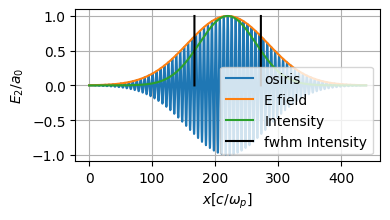

In [2]:
fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(4,4))
mrkrsz = 1

a0 = 15 #[]
files = glob.glob('simulations/PWa15/MS/FLD/e2/*.h5')
files.sort()
filef = h5py.File(files[0], 'r')
axis1 = np.array(filef['AXIS']['AXIS1'])
xlst = np.linspace(np.min(axis1), np.max(axis1), len(np.array(filef['e2'])))
plt.plot(xlst, np.array(filef['e2'])/a0, label=r'osiris' )

lon_duration = 127 #[c/wp]
lon_range = 420 #[c/wp]
lon_x0 = 220 #[c/wp]

Eprofile = exp(-2*((xlst-lon_x0)/lon_duration)**2)
Iprofile = (Eprofile)**2
plt.plot(xlst, Eprofile, label=r'E field' )
plt.plot(xlst, Iprofile, label=r'Intensity' )
#plt.plot(xlst, exp(-2*((xlst-lon_x0)/lon_duration)**2)*cos(xlst-2*(xlst[1]-xlst[0])), '--', alpha=0.4 )

fwhmI = 272.76990718 - 167.23009282
plt.plot( xlst*0 + lon_x0-fwhmI/2, xlst/440, 'k-', label=r'fwhm Intensity' )
plt.plot( xlst*0 + lon_x0+fwhmI/2, xlst/440, 'k-' )

#axes.set_xlim([0,50])
#axes.set_ylim([0,0.01])
axes.grid()
# aspect
xmin, xmax = axes.get_xlim()
ymin, ymax = axes.get_ylim()
axesratio = (ymax-ymin)/(xmax-xmin)
axes.set_aspect(aspect=1/2/axesratio)
#axes.legend()
axes.set_xlabel(r'$x[c/\omega_p]$')
axes.set_ylabel(r'$E_2 / a_0$')
axes.legend(loc='lower right')
    
plt.tight_layout()
plt.show()

# Figure 1

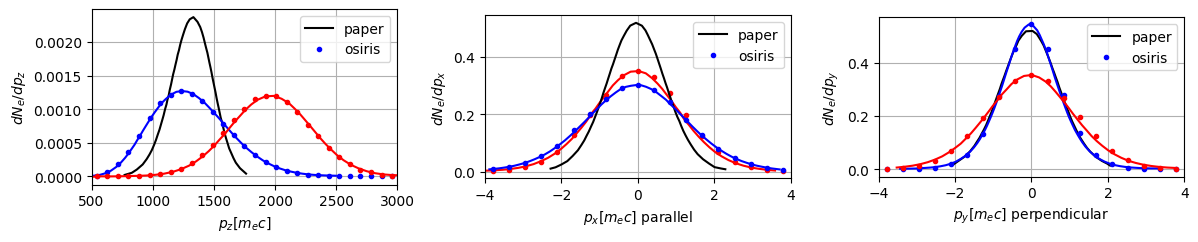

In [3]:
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(12,8))
mrkrsz = 1

f = open('data/fig1a/wpd.json')
data = json.load(f)

datatmp = data['datasetColl'][0]['data']
datatmp2 = np.array([datatmp[i]['value'] for i in range(len(datatmp))])
indxs = np.argsort(datatmp2[:,0])
axes[0].plot(datatmp2[:,0][indxs],datatmp2[:,1][indxs],'k-',markersize=mrkrsz,label=r'paper') #k.
# quantum - paper
datatmp = data['datasetColl'][1]['data']
datatmp2 = np.array([datatmp[i]['value'] for i in range(len(datatmp))])
indxs = np.argsort(datatmp2[:,0])
axes[0].plot(datatmp2[:,0][indxs],datatmp2[:,1][indxs],'b-') #b-
# quantum - simulation
enelst = np.linspace(500,3000,30)
files = glob.glob('simulations/PWa15/MS/RAW/electrons/*.h5')
files.sort()
filef = h5py.File(files[-1], 'r')
enedist = np.array(filef['p1'])
qdist = np.array(filef['q'])*-1
ytmp, xtmp = np.histogram(enedist, enelst, weights = qdist)
ytmp, xtmp = ytmp, arraycenter(xtmp)
axes[0].plot(xtmp, np.max(datatmp2[:,1][indxs])*ytmp/np.max(ytmp), 'b.', label=r'osiris')

datatmp = data['datasetColl'][2]['data']
datatmp2 = np.array([datatmp[i]['value'] for i in range(len(datatmp))])
indxs = np.argsort(datatmp2[:,0])
axes[0].plot(datatmp2[:,0][indxs],datatmp2[:,1][indxs],'r-') #'r--'
# quantum - simulation initial condition
enelst = np.linspace(500,3000,30)
files = glob.glob('simulations/PWa15/MS/RAW/electrons/*.h5')
files.sort()
filef = h5py.File(files[0], 'r')
enedist = np.array(filef['ene'])
qdist = np.array(filef['q'])*-1
ytmp, xtmp = np.histogram(enedist, enelst, weights = qdist)
ytmp, xtmp = ytmp, arraycenter(xtmp)
axes[0].plot(xtmp, np.max(datatmp2[:,1][indxs])*ytmp/np.max(ytmp), 'r.')


f = open('data/fig1b/wpd.json')
data = json.load(f)

datatmp = data['datasetColl'][0]['data']
datatmp2 = np.array([datatmp[i]['value'] for i in range(len(datatmp))])
indxs = np.argsort(datatmp2[:,0])
axes[1].plot(datatmp2[:,0][indxs],datatmp2[:,1][indxs],'r-') #'r--'
# quantum - simulation, initial condition
p2lst = np.linspace(-4,+4,20)
files = glob.glob('simulations/PWa15/MS/RAW/electrons/*.h5')
files.sort()
filef = h5py.File(files[0], 'r')
p2dist = np.array(filef['p2'])
qdist = np.array(filef['q'])*-1
ytmp, xtmp = np.histogram(p2dist, p2lst, weights = qdist)
ytmp, xtmp = ytmp, arraycenter(xtmp)
axes[1].plot(xtmp, np.max(datatmp2[:,1][indxs])*ytmp/np.max(ytmp), 'r.')

datatmp = data['datasetColl'][2]['data']
datatmp2 = np.array([datatmp[i]['value'] for i in range(len(datatmp))])
indxs = np.argsort(datatmp2[:,0])
axes[1].plot(datatmp2[:,0][indxs],datatmp2[:,1][indxs],'k-',markersize=mrkrsz,label=r'paper') #'k.'

datatmp = data['datasetColl'][1]['data']
datatmp2 = np.array([datatmp[i]['value'] for i in range(len(datatmp))])
indxs = np.argsort(datatmp2[:,0])
axes[1].plot(datatmp2[:,0][indxs],datatmp2[:,1][indxs],'b-') #'b-'
# quantum - simulation
p2lst = np.linspace(-4,+4,20)
files = glob.glob('simulations/PWa15/MS/RAW/electrons/*.h5')
files.sort()
filef = h5py.File(files[-1], 'r')
p2dist = np.array(filef['p2'])
qdist = np.array(filef['q'])*-1
ytmp, xtmp = np.histogram(p2dist, p2lst, weights = qdist)
ytmp, xtmp = ytmp, arraycenter(xtmp)
axes[1].plot(xtmp, np.max(datatmp2[:,1][indxs])*ytmp/np.max(ytmp), 'b.', label=r'osiris')


f = open('data/fig1c/wpd.json')
data = json.load(f)

datatmp = data['datasetColl'][2]['data']
datatmp2 = np.array([datatmp[i]['value'] for i in range(len(datatmp))])
indxs = np.argsort(datatmp2[:,0])
axes[2].plot(datatmp2[:,0][indxs],datatmp2[:,1][indxs],'k-',markersize=mrkrsz,label=r'paper') #'k.'

datatmp = data['datasetColl'][0]['data']
datatmp2 = np.array([datatmp[i]['value'] for i in range(len(datatmp))])
indxs = np.argsort(datatmp2[:,0])
axes[2].plot(datatmp2[:,0][indxs],datatmp2[:,1][indxs],'b-') #'b-'
# quantum - simulation
p3lst = np.linspace(-4,+4,20)
files = glob.glob('simulations/PWa15/MS/RAW/electrons/*.h5')
files.sort()
filef = h5py.File(files[-1], 'r')
p3dist = np.array(filef['p3'])
qdist = np.array(filef['q'])*-1
ytmp, xtmp = np.histogram(p3dist, p3lst, weights = qdist)
ytmp, xtmp = ytmp, arraycenter(xtmp)
axes[2].plot(xtmp, np.max(datatmp2[:,1][indxs])*ytmp/np.max(ytmp), 'b.', label=r'osiris')

datatmp = data['datasetColl'][1]['data']
datatmp2 = np.array([datatmp[i]['value'] for i in range(len(datatmp))])
indxs = np.argsort(datatmp2[:,0])
axes[2].plot(datatmp2[:,0][indxs],datatmp2[:,1][indxs],'r-') #'r--'
# quantum - simulation, initial condition
p3lst = np.linspace(-4,+4,20)
files = glob.glob('simulations/PWa15/MS/RAW/electrons/*.h5')
files.sort()
filef = h5py.File(files[0], 'r')
p2dist = np.array(filef['p3'])
qdist = np.array(filef['q'])*-1
ytmp, xtmp = np.histogram(p2dist, p2lst, weights = qdist)
ytmp, xtmp = ytmp, arraycenter(xtmp)
axes[2].plot(xtmp, np.max(datatmp2[:,1][indxs])*ytmp/np.max(ytmp), 'r.')

for i in range(3):
    #axes[i].set_xlim([0,2000])
    #axes[i].set_ylim([0,25])
    axes[i].grid()

    # aspect
    xmin, xmax = axes[i].get_xlim()
    ymin, ymax = axes[i].get_ylim()
    axesratio = (ymax-ymin)/(xmax-xmin)
    axes[i].set_aspect(aspect=1/2/axesratio)
    axes[i].legend()
    
    
axes[0].set_xlabel(r'$p_z[m_e c]$')
axes[0].set_ylabel(r'$dN_e/dp_z$')
axes[1].set_xlabel(r'$p_x[m_e c]$ parallel')
axes[1].set_ylabel(r'$dN_e/dp_x$')
axes[2].set_xlabel(r'$p_y[m_e c]$ perpendicular')
axes[2].set_ylabel(r'$dN_e/dp_y$')

axes[0].set_xlim([500,3000])
axes[1].set_xlim([-4,+4])
axes[2].set_xlim([-4,+4])

"""
# confirm Gaussian with 1 GeV mean energy and 400 MeV energy spread FWHM. 
# fwhm = 2.35482 sigma 
# pz ~ gamma
z = np.linspace(500,3000)
axes[0].plot( z, 0.0012*exp(-0.5*((z-1/0.511e-3)/(400/0.511/2.35482 ) )**2) )

# px, py ~ theta * pz
# theta ~ 1.4e-3
# 1000/0.511/2.35482*1.4e-3 = 1.1634545431910974
x = np.linspace(-4,+4)
axes[1].plot( x, 0.35*exp(-0.5*(x/(1000/0.511/2.35482*1.4e-3))**2) )
axes[2].plot( x, 0.35*exp(-0.5*(x/(1000/0.511/2.35482*1.4e-3))**2) )
"""

plt.tight_layout()
#plt.savefig('fig1.pdf', transparent=True)
plt.show()

# Figure 2

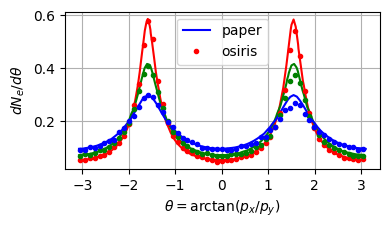

In [4]:
fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(4,4))
mrkrsz = 1

f = open('data/fig2/wpd.json')
data = json.load(f)

datatmp = data['datasetColl'][0]['data']
datatmp2 = np.array([datatmp[i]['value'] for i in range(len(datatmp))])
indxs = np.argsort(datatmp2[:,0])
axes.plot(datatmp2[:,0][indxs],datatmp2[:,1][indxs],'r-',markersize=mrkrsz)

datatmp = data['datasetColl'][1]['data']
datatmp2 = np.array([datatmp[i]['value'] for i in range(len(datatmp))])
indxs = np.argsort(datatmp2[:,0])
axes.plot(datatmp2[:,0][indxs],datatmp2[:,1][indxs],'g-')

datatmp = data['datasetColl'][2]['data']
datatmp2 = np.array([datatmp[i]['value'] for i in range(len(datatmp))])
indxs = np.argsort(datatmp2[:,0])
axes.plot(datatmp2[:,0][indxs],datatmp2[:,1][indxs],'b-',label=r'paper')

"""
# confirm Gaussian with 1 GeV mean energy and 400 MeV energy spread FWHM. 
# fwhm = 2.35482 sigma 
# pz ~ gamma
z = np.linspace(500,3000)
axes[0].plot( z, 0.0012*exp(-0.5*((z-1/0.511e-3)/(400/0.511/2.35482 ) )**2) )

# px, py ~ theta * pz
# theta ~ 1.4e-3
# 1000/0.511/2.35482*1.4e-3 = 1.1634545431910974
x = np.linspace(-4,+4)
axes[1].plot( x, 0.35*exp(-0.5*(x/(1000/0.511/2.35482*1.4e-3))**2) )
axes[2].plot( x, 0.35*exp(-0.5*(x/(1000/0.511/2.35482*1.4e-3))**2) )
"""

thlst = np.linspace(-3.1,+3.1,60)
files = glob.glob('simulations/PWa21/MS/RAW/electrons/*.h5')
files.sort()
filef = h5py.File(files[-1], 'r')
p2dist = np.array(filef['p2'])
p3dist = np.array(filef['p3'])
qdist = np.array(filef['q'])*-1
thdist = np.arctan2(p2dist,p3dist)
ytmp, xtmp = np.histogram(thdist, thlst, weights = qdist)
ytmp, xtmp = ytmp, arraycenter(xtmp)
axes.plot(xtmp, 0.58*ytmp/np.max(ytmp), 'r.', label=r'osiris')


files = glob.glob('simulations/PWa18/MS/RAW/electrons/*.h5')
files.sort()
filef = h5py.File(files[-1], 'r')
p2dist = np.array(filef['p2'])
p3dist = np.array(filef['p3'])
qdist = np.array(filef['q'])*-1
thdist = np.arctan2(p2dist,p3dist)
ytmp, xtmp = np.histogram(thdist, thlst, weights = qdist)
ytmp, xtmp = ytmp, arraycenter(xtmp)
axes.plot(xtmp, 0.41*ytmp/np.max(ytmp), 'g.')


files = glob.glob('simulations/PWa15/MS/RAW/electrons/*.h5')
files.sort()
filef = h5py.File(files[-1], 'r')
p2dist = np.array(filef['p2'])
p3dist = np.array(filef['p3'])
qdist = np.array(filef['q'])*-1
thdist = np.arctan2(p2dist,p3dist)
ytmp, xtmp = np.histogram(thdist, thlst, weights = qdist)
ytmp, xtmp = ytmp, arraycenter(xtmp)
axes.plot(xtmp, 0.3*ytmp/np.max(ytmp), 'b.')

axes.grid()
# aspect
xmin, xmax = axes.get_xlim()
ymin, ymax = axes.get_ylim()
axesratio = (ymax-ymin)/(xmax-xmin)
axes.set_aspect(aspect=1/2/axesratio)
axes.legend()
axes.set_xlabel(r'$\theta=\mathrm{arctan}(p_x/p_y)$')
axes.set_ylabel(r'$dN_e/d\theta$')
    
plt.tight_layout()
#plt.savefig('fig2.pdf', transparent=True)
plt.show()

# Figure 3

Electrons are propagated ballistically after interaction for 10 cm, thus reaching the detector with coordinates

$$x' = d~\arctan(p_x/p_z), y' = d~\arctan(p_y/p_z) $$

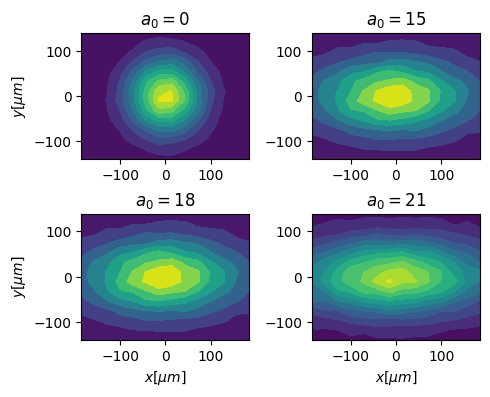

In [52]:
d = 0.1 #[m]
nlevels = 10

nbins = 15
xedges = np.linspace(-200,+200,nbins)
yedges = np.linspace(-150,+150,nbins)

fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(5,4))

files = glob.glob('simulations/PWa15/MS/RAW/electrons/*.h5')
files.sort()
filef = h5py.File(files[0], 'r')
p1dist = np.array(filef['p1'])
p2dist = np.array(filef['p2'])
p3dist = np.array(filef['p3'])
qdist = np.array(filef['q'])*-1
xp = d * np.arctan(p2dist/p1dist) *1e6 #[\mu m]
yp = d * np.arctan(p3dist/p1dist) *1e6 #[\mu m]
H, xedges, yedges = np.histogram2d(xp, yp, bins=(xedges, yedges))
H = H.T
axes[0,0].contourf(H, levels=nlevels, origin='lower', extent=[xedges[0], xedges[-1], yedges[0], yedges[-1]])

files = glob.glob('simulations/PWa18/MS/RAW/electrons/*.h5')
files.sort()
filef = h5py.File(files[-1], 'r')
p1dist = np.array(filef['p1'])
p2dist = np.array(filef['p2'])
p3dist = np.array(filef['p3'])
qdist = np.array(filef['q'])*-1
xp = d * np.arctan(p2dist/p1dist) *1e6 #[\mu m]
yp = d * np.arctan(p3dist/p1dist) *1e6 #[\mu m]
H, xedges, yedges = np.histogram2d(xp, yp, bins=(xedges, yedges))
H = H.T
axes[0,1].contourf(H, levels=nlevels, origin='lower', extent=[xedges[0], xedges[-1], yedges[0], yedges[-1]])

files = glob.glob('simulations/PWa18/MS/RAW/electrons/*.h5')
files.sort()
filef = h5py.File(files[-1], 'r')
p1dist = np.array(filef['p1'])
p2dist = np.array(filef['p2'])
p3dist = np.array(filef['p3'])
qdist = np.array(filef['q'])*-1
xp = d * np.arctan(p2dist/p1dist) *1e6 #[\mu m]
yp = d * np.arctan(p3dist/p1dist) *1e6 #[\mu m]
H, xedges, yedges = np.histogram2d(xp, yp, bins=(xedges, yedges))
H = H.T
axes[1,0].contourf(H, levels=nlevels, origin='lower', extent=[xedges[0], xedges[-1], yedges[0], yedges[-1]])

files = glob.glob('simulations/PWa21/MS/RAW/electrons/*.h5')
files.sort()
filef = h5py.File(files[-1], 'r')
p1dist = np.array(filef['p1'])
p2dist = np.array(filef['p2'])
p3dist = np.array(filef['p3'])
qdist = np.array(filef['q'])*-1
xp = d * np.arctan(p2dist/p1dist) *1e6 #[\mu m]
yp = d * np.arctan(p3dist/p1dist) *1e6 #[\mu m]
H, xedges, yedges = np.histogram2d(xp, yp, bins=(xedges, yedges))
H = H.T
axes[1,1].contourf(H, levels=nlevels, origin='lower', extent=[xedges[0], xedges[-1], yedges[0], yedges[-1]])


aspratio = 3/4
xmin, xmax = axes[0,0].get_xlim()
ymin, ymax = axes[0,0].get_ylim()
axesratio = (ymax-ymin)/(xmax-xmin)
axes[0,0].set_aspect(aspect=aspratio/axesratio)
xmin, xmax = axes[0,1].get_xlim()
ymin, ymax = axes[0,1].get_ylim()
axesratio = (ymax-ymin)/(xmax-xmin)
axes[0,1].set_aspect(aspect=aspratio/axesratio)
xmin, xmax = axes[1,0].get_xlim()
ymin, ymax = axes[1,0].get_ylim()
axesratio = (ymax-ymin)/(xmax-xmin)
axes[1,0].set_aspect(aspect=aspratio/axesratio)
xmin, xmax = axes[1,1].get_xlim()
ymin, ymax = axes[1,1].get_ylim()
axesratio = (ymax-ymin)/(xmax-xmin)
axes[1,1].set_aspect(aspect=aspratio/axesratio)

axes[1,0].set_xlabel(r'$x[\mu m]$')
axes[1,1].set_xlabel(r'$x[\mu m]$')
axes[0,0].set_ylabel(r'$y[\mu m]$')
axes[1,0].set_ylabel(r'$y[\mu m]$')

axes[0,0].set_title(r'$a_0=0$')
axes[0,1].set_title(r'$a_0=15$')
axes[1,0].set_title(r'$a_0=18$')
axes[1,1].set_title(r'$a_0=21$')

plt.tight_layout()
plt.savefig('fig3.pdf', transparent=True)
plt.show()